# The Power of Plots

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

#csv data
mouse_path = "Resources/Mouse_metadata.csv"
results_path = "Resources/Study_results.csv"

#read csv data
mouse_data = pd.read_csv(mouse_path)
results_data = pd.read_csv(results_path)

#merge csv data
mouse_results = pd.merge(mouse_data, results_data, how= "left", on= ['Mouse ID'] )
mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Count number of mice and check for duplicate Mouse ID
len(mouse_results['Mouse ID'].unique())

249

In [7]:
# Get the duplicate mouse by ID number that shows up for Mouse ID and Timepoint. 

dup_mouse_data = mouse_results.loc[mouse_results.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dup_mouse_data

array(['g989'], dtype=object)

In [8]:
#Duplicate mouse data
dup_mouse_data = mouse_results.loc[mouse_results['Mouse ID']=='g989']
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
#Clean Dataframe by dropping duplicate mouse by ID

clean_mouse_data = mouse_results[mouse_results['Mouse ID'].isin(dup_mouse_data)==False]
clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
clean_mouse_data.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [11]:
# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen
mouse_mean =clean_mouse_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mouse_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [12]:
mouse_median =clean_mouse_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
mouse_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [13]:
mouse_var =clean_mouse_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
mouse_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [14]:
mouse_std =clean_mouse_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
mouse_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [15]:
mouse_sem =clean_mouse_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
mouse_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

# Summary Statistics

In [16]:
#Generate a summary statistics table

summary_df = round(pd.DataFrame({"Mean": mouse_mean, "Median": mouse_median, "Variance": mouse_var, "Std Deviation": mouse_std, "SEM": mouse_sem}),2)
summary_df

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


# Bar Charts

##Bar Charts that show the total number of measurements taken for each treatment regimen throughout the course of the study.


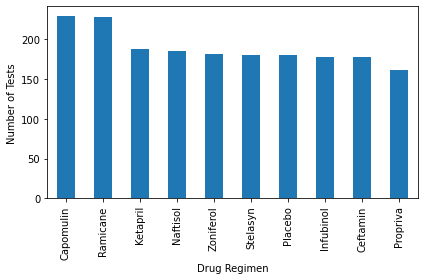

In [33]:
#Pandas BarChart
num_regimens = clean_mouse_data['Drug Regimen'].value_counts()
num_regimens.plot(kind='bar')
# Add labels
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Tests')
plt.tight_layout()

In [ ]:
#Matplot Bar Chart

# Pie Charts

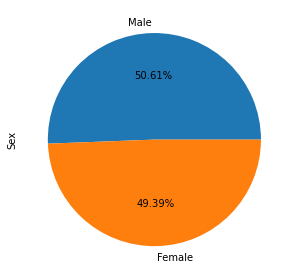

In [32]:
#Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the distribution of female or male mice in the study.

mouse_gender_count =clean_mouse_data['Sex'].value_counts()
mouse_gender_count.plot(kind= 'pie',autopct='%1.2f%%')
plt.tight_layout()

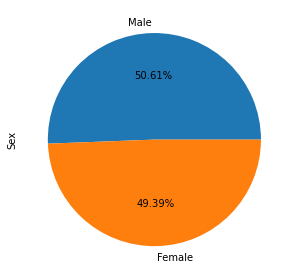

In [39]:
#Matplot Pie Chart
mouse_gender_count =clean_mouse_data.Sex.value_counts()
plt.pie(mouse_gender_count.values, labels=mouse_gender_count.index.values,autopct='%1.2f%%')
plt.ylabel("Sex")
plt.tight_layout()

In [ ]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens

In [ ]:
#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

In [ ]:
#Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

In [ ]:
#Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.


In [ ]:
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

In [ ]:
#Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.